In [6]:
import pandas as pd

In [7]:

data_2022 = pd.read_csv("Datasets/ActuacionesBomberos_2022.csv", sep=';')
data_2023 = pd.read_csv("Datasets/ActuacionesBomberos_2023.csv", sep=';')

combined_data = pd.concat([data_2022, data_2023])

combined_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/ActuacionesBomberos_2022.csv'

In [ ]:
# Resumen estadístico del conjunto de datos
summary_statistics = combined_data.describe()

summary_statistics


In [ ]:
# Verificación de valores nulos en el conjunto de datos
null_values = combined_data.isnull().sum()

null_values


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos de gráficos
sns.set(style="whitegrid")

# Distribución de actuaciones por distrito
plt.figure(figsize=(15, 8))
sns.countplot(data=combined_data, y='DISTRITO', order = combined_data['DISTRITO'].value_counts().index)
plt.title('Distribución de Actuaciones por Distrito')
plt.xlabel('Número de Actuaciones')
plt.ylabel('Distrito')
plt.show()

In [3]:
# Distribución de actuaciones por mes
plt.figure(figsize=(15, 8))
sns.countplot(data=combined_data, x='MES', order = combined_data['MES'].value_counts().index)
plt.title('Distribución de Actuaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Actuaciones')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

/home/duo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/duo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/duo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/duo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

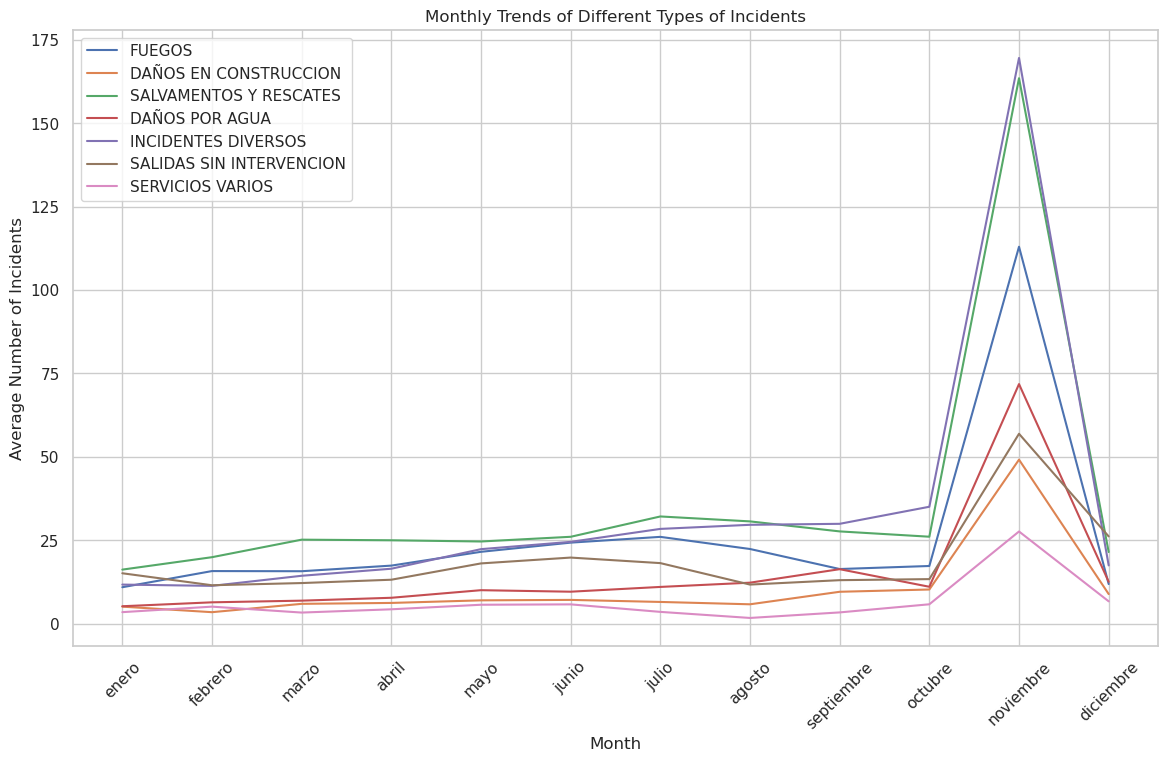

In [20]:

monthly_trends = combined_data.groupby('MES')[incident_columns].mean()

month_order = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
               'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
monthly_trends = monthly_trends.reindex(month_order)

plt.figure(figsize=(14, 8))
for column in incident_columns:
    sns.lineplot(data=monthly_trends, x=monthly_trends.index, y=column, label=column)
plt.xticks(rotation=45)
plt.title('Monthly Trends of Different Types of Incidents')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Month')
plt.legend()
plt.show()


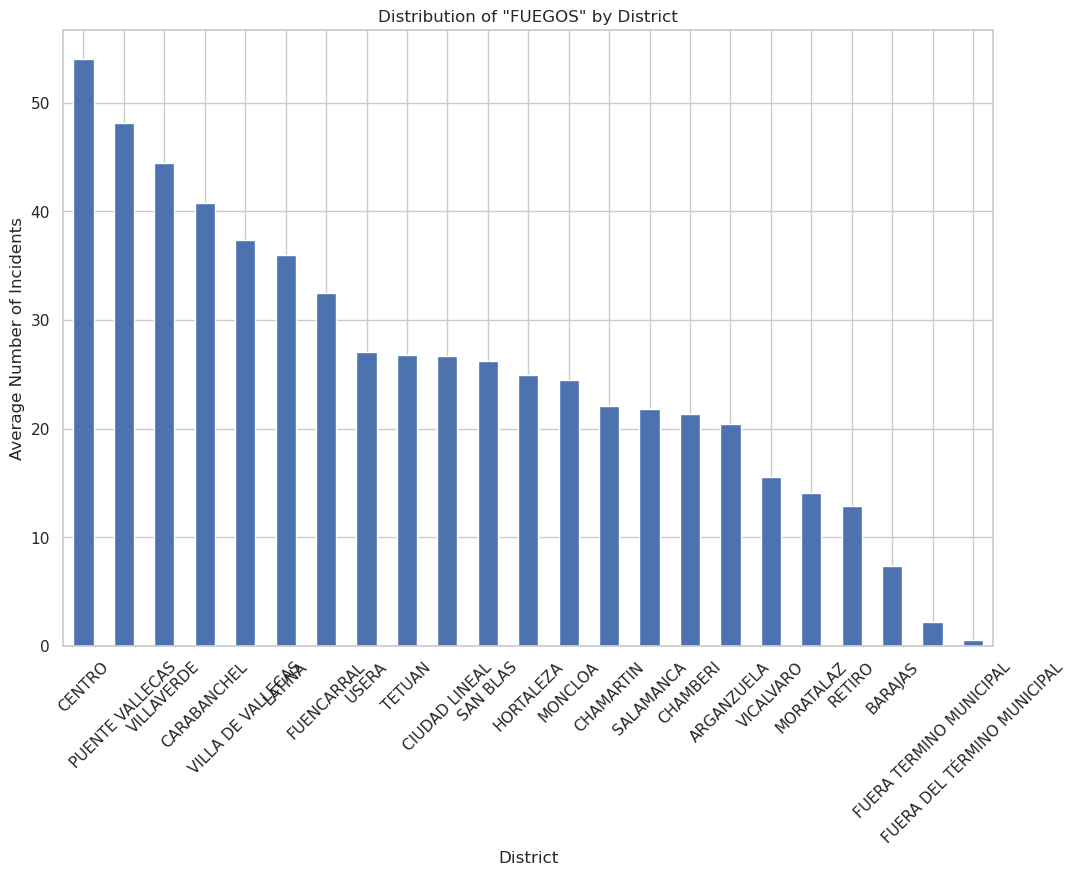

In [21]:
# For demonstration, let's choose 'FUEGOS' as the incident type
incident_type = 'FUEGOS'

# Grouping the data by district and calculating the mean for the selected type of incident
district_distribution = combined_data.groupby('DISTRITO')[incident_type].mean().sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(12, 8))
district_distribution.plot(kind='bar')
plt.title(f'Distribución de  "{incident_type}" por distrito')
plt.ylabel('Media de incidencia')
plt.xlabel('Distrito')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

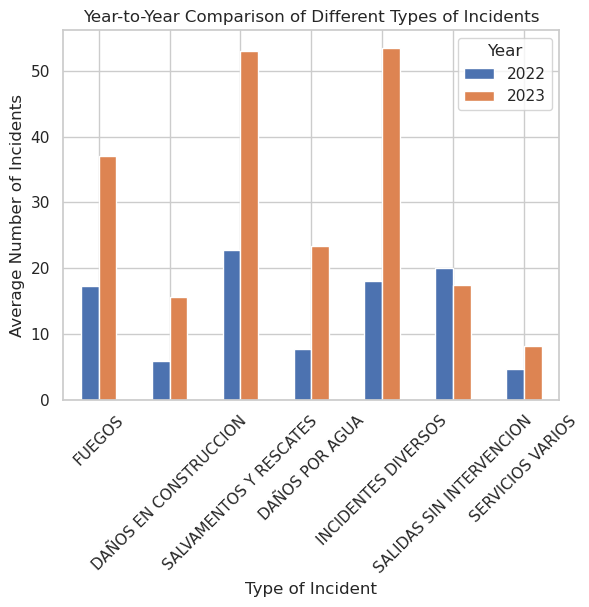

In [22]:
yearly_comparison = combined_data.groupby('AÑO')[incident_columns].mean()
plt.figure(figsize=(12, 8))
yearly_comparison.T.plot(kind='bar')
plt.title('Comparación año a año de incidentes')
plt.ylabel('Media de incidentes')
plt.xlabel('Tipo')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()

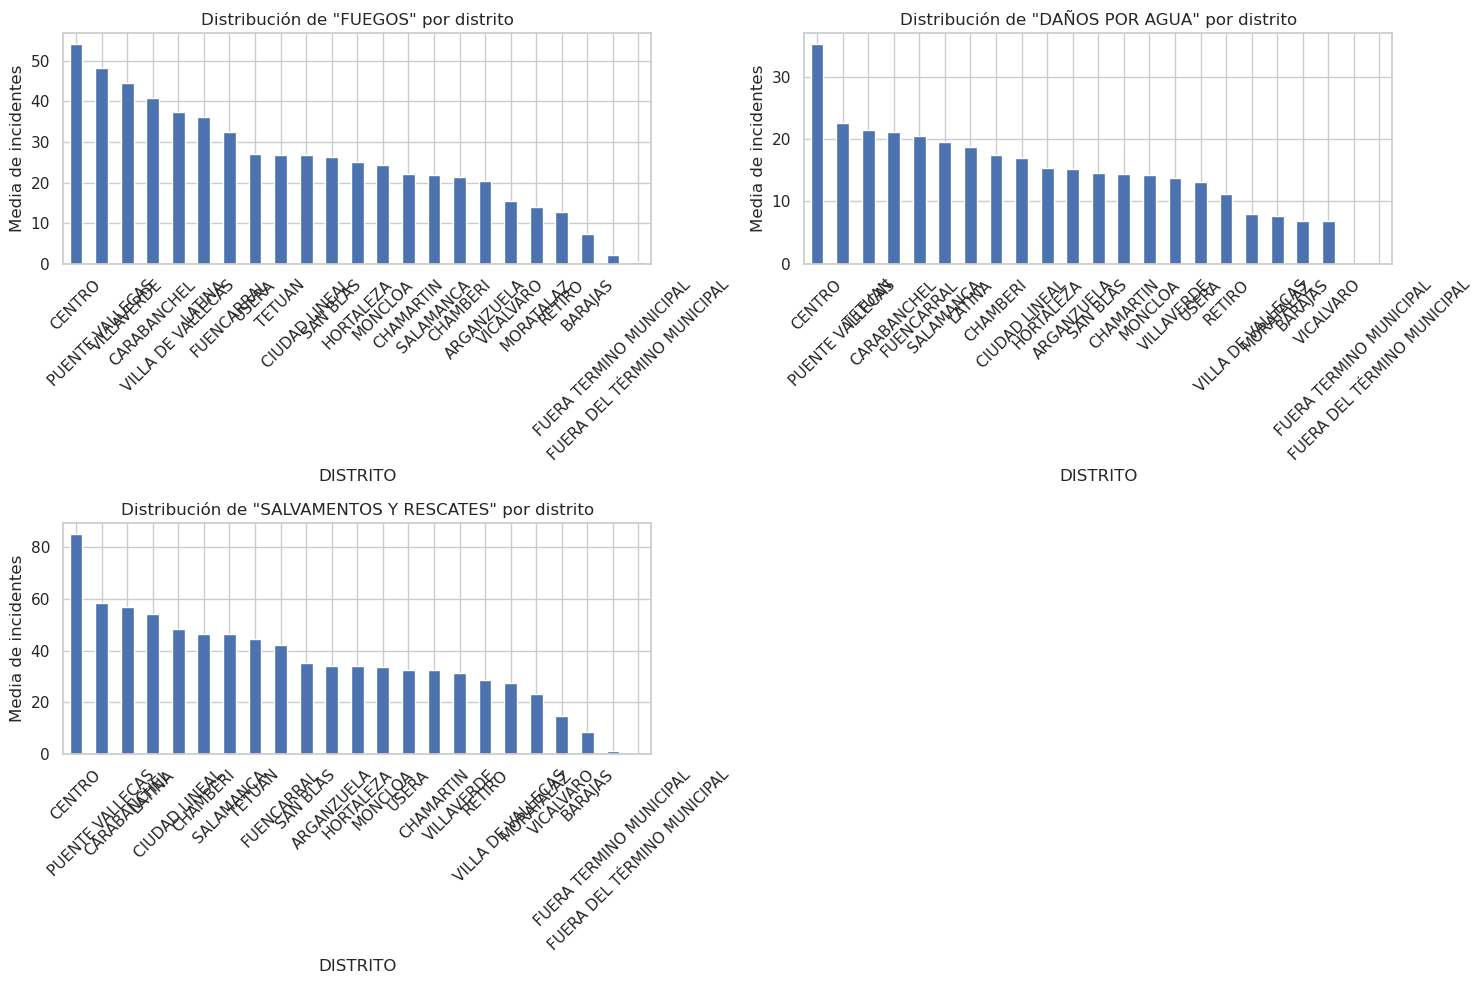

In [37]:

selected_incidents = ['FUEGOS', 'DAÑOS POR AGUA', 'SALVAMENTOS Y RESCATES']

# Grouping the data by district and calculating the mean for the selected types of incidents
district_incident_analysis = combined_data.groupby('DISTRITO')[selected_incidents].mean()

# Plotting the distribution
plt.figure(figsize=(15, 10))

for i, incident in enumerate(selected_incidents, 1):
    plt.subplot(2, 2, i)
    district_incident_analysis[incident].sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Distribución de "{incident}" por distrito')
    plt.ylabel('Media de incidentes')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


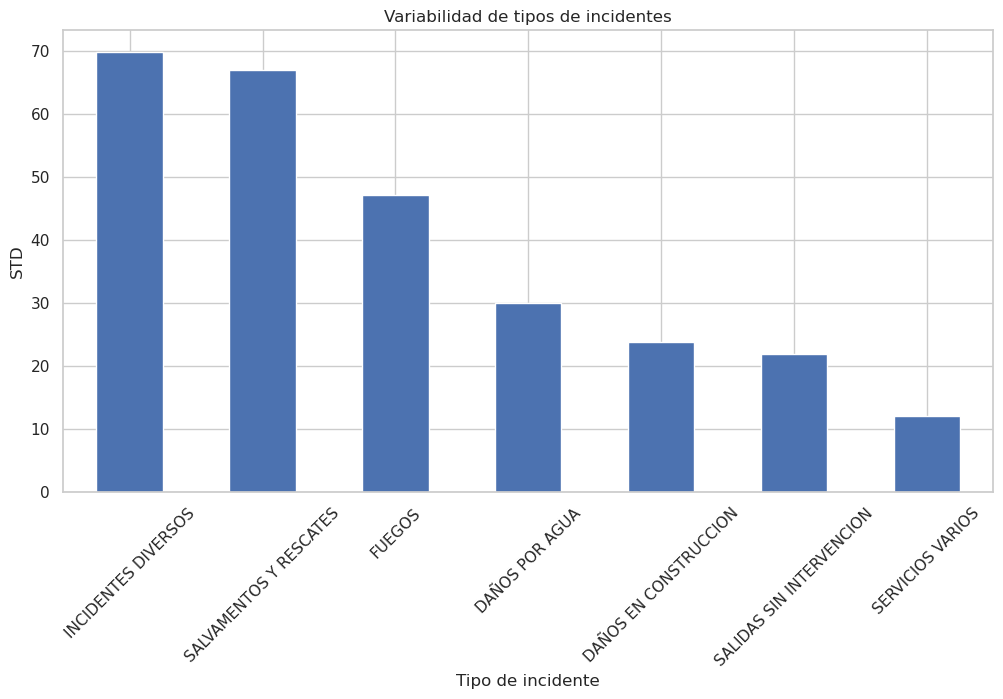

In [28]:

incident_variability = combined_data[incident_columns].std().sort_values(ascending=False)

# Plotting the incidents with their variability
plt.figure(figsize=(12, 6))
incident_variability.plot(kind='bar')
plt.title('Variabilidad de tipos de incidentes')
plt.ylabel('STD')
plt.xlabel('Tipo de incidente')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

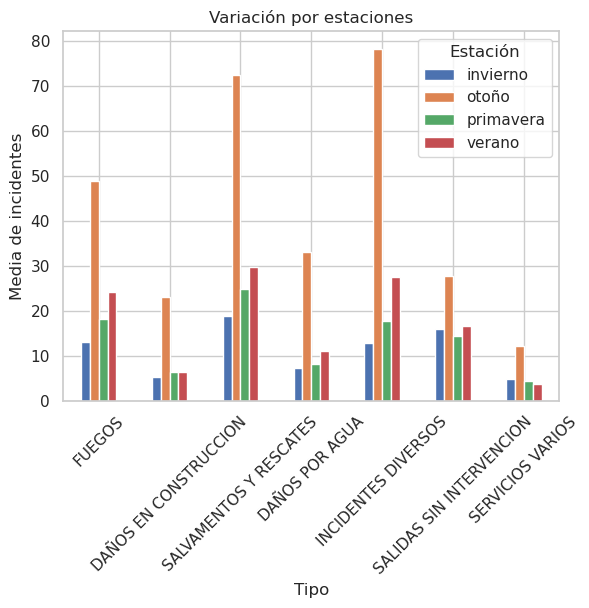

In [30]:
seasons = {
    'enero': 'invierno', 'febrero': 'invierno', 'marzo': 'primavera',
    'abril': 'primavera', 'mayo': 'primavera', 'junio': 'verano',
    'julio': 'verano', 'agosto': 'verano', 'septiembre': 'otoño',
    'octubre': 'otoño', 'noviembre': 'otoño', 'diciembre': 'invierno'
}

# Adding a season column to the data
combined_data['ESTACION'] = combined_data['MES'].map(seasons)

# Grouping the data by season and calculating the mean for each type of incident
seasonal_variation = combined_data.groupby('ESTACION')[incident_columns].mean()

# Plotting the seasonal variation
plt.figure(figsize=(12, 8))
seasonal_variation.T.plot(kind='bar')
plt.title('Variación por estaciones')
plt.ylabel('Media de incidentes')
plt.xlabel('Tipo')
plt.xticks(rotation=45)
plt.legend(title='Estación')
plt.show()

In [35]:

incident_columns = ['FUEGOS', 'DAÑOS EN CONSTRUCCION', 'SALVAMENTOS Y RESCATES',
                    'DAÑOS POR AGUA', 'INCIDENTES DIVERSOS', 'SALIDAS SIN INTERVENCION',
                    'SERVICIOS VARIOS']

# Defining a function to detect outliers
def detect_outliers(df, columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile (25%)
        Q1 = df[column].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[column].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step calculation
        outlier_step = 1.5 * IQR

        # Identifying outliers
        outlier_list_col = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    # Select observations with more than one outlier
    outlier_indices = list(set(outlier_indices))
    return df.loc[outlier_indices]

# Detecting outliers in the dataset
outliers = detect_outliers(combined_data, incident_columns)

# Displaying the results
outliers_summary = outliers.describe()
outliers_summary, outliers.head()  # Displaying the first few rows of outliers for review


(               AÑO      FUEGOS  DAÑOS EN CONSTRUCCION  SALVAMENTOS Y RESCATES  \
 count   116.000000  116.000000             116.000000              116.000000   
 mean   2022.500000   61.258621              27.922414               86.146552   
 std       0.502169   88.294480              44.970551              126.683395   
 min    2022.000000    0.000000               0.000000                0.000000   
 25%    2022.000000   13.750000               7.000000               22.750000   
 50%    2022.500000   26.500000              11.000000               37.000000   
 75%    2023.000000   51.000000              27.250000               64.000000   
 max    2023.000000  444.000000             352.000000              721.000000   
 
        DAÑOS POR AGUA  INCIDENTES DIVERSOS  SALIDAS SIN INTERVENCION  \
 count      116.000000           116.000000                116.000000   
 mean        38.413793            86.155172                 37.275862   
 std         55.867089           131.6822

Se encontraron 71 registros que se consideran outliers.
Características de los Outliers:
        Variaciones en el Año: Los outliers están distribuidos entre 2022 y 2023.
        Promedios Elevados: Los valores promedio de diferentes tipos de incidentes en estos registros son significativamente más altos que los del conjunto de datos general. Por ejemplo, el promedio de "Fuegos" en estos outliers es de aproximadamente 90, que es mucho mayor que el promedio general.
        Variabilidad en los Incidentes: Hay una amplia variación en la cantidad de incidentes reportados en estos outliers, lo que sugiere que estos registros representan situaciones excepcionales o inusuales.

Los primeros cinco registros identificados como outliers incluyen incidentes con cantidades significativamente altas de diferentes tipos de intervenciones, como fuegos, salvamentos y rescates, daños por agua, entre otros. Estos outliers pueden representar eventos mayores, como grandes incendios o situaciones de emergencia que requirieron una respuesta extensa de los servicios de bomberos.